# Cthulhu News Draft Three

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [3]:
from IPython.display import Image

import os
import json
from datetime import datetime, timedelta, timezone
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from envparse import env
from loguru import logger
from logutil import init_loguru

2025-06-21T11:21:22.597Z __main__ DEBUG: this is a test log line


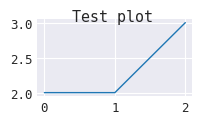

In [4]:
np.random.seed(42**3)

init_loguru()
logger.debug("this is a test log line")

# plt.style.use('ggplot')
# plt.style.use('dark_background')
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.size"] = 9

plt.figure(figsize=(2, 1))
plt.plot([0, 1, 2], [2, 2, 3])
plt.suptitle("Test plot")

np.set_printoptions(edgeitems=30, linewidth=10000)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 80
pd.options.display.max_colwidth = 100

In [5]:
load_dotenv()

print(env.str("POSTGRES_HOST"))
print(env.str("OPENAI_API_KEY")[-3:])

localhost
gsV


In [9]:
from web import db_utils
from web import etl
from web import llm_cthulhu_new as llm
from web import llm_cthulhu_prompts as prompts

2025-06-21T11:22:49.787Z web.etl DEBUG: CTHULHU_IMAGE_DIR=/Users/nameless/dev/proj/cthulhu-news/drafts/data/images
2025-06-21T11:22:49.791Z web.db_utils INFO: initialized the local news db


In [10]:
def default_json_converter(o):
    if isinstance(o, datetime):
        return o.isoformat()
    raise TypeError(f'Object of type {o.__class__.__name__} is not JSON serializable')

## Mongo db

### Load News Articles

In [ ]:
to_ = datetime.now()
from_ = to_ - timedelta(days=5)
news_articles = etl.load_mongo_news_articles(from_=from_, to_=to_, limit=10)
print(len(news_articles))

2024-12-27T09:55:14.009Z web.etl DEBUG: mongo filter_params={'gpt_summary': {'$exists': True}, 'published_at': {'$gt': datetime.datetime(2024, 12, 22, 10, 55, 14, 4482), '$lt': datetime.datetime(2024, 12, 27, 10, 55, 14, 4482)}}


2024-12-27T09:55:19.493Z web.etl DEBUG: loaded a news article title=Met Office confirms Christmas Day weather forecast for Greater Manchester published_at=2024-12-23 14:15:34
2024-12-27T09:55:19.494Z web.etl DEBUG: loaded a news article title=Blast of Ontario snow brings weather warnings and signs of white Christmas published_at=2024-12-23 13:57:59
2024-12-27T09:55:19.494Z web.etl DEBUG: loaded a news article title=UK snow maps turn purple for New Year's Day with 10cm forecast in -5C New Year whiteout published_at=2024-12-23 13:46:56
2024-12-27T09:55:19.495Z web.etl DEBUG: loaded a news article title=State pensioners urged to unplug nine items around home within 'one week' published_at=2024-12-23 13:17:37
2024-12-27T09:55:19.495Z web.etl DEBUG: loaded a news article title=Chilling twist in brutal 'execution' murders of couple kidnapped & forced to drive into forest before being shot dead published_at=2024-12-23 13:14:47
2024-12-27T09:55:19.495Z web.etl DEBUG: loaded a news article titl

10


## Postgres db

### Download existing Cthulhu articles

In [9]:
# db.init_local_news_db()

In [ ]:
cthulhu_articles = db_utils.load_formatted_cthulhu_articles(article_id=None)
print(len(cthulhu_articles))

2024-12-27T09:55:19.517Z web.db DEBUG: getting all Cthulhu articles from the local db article_id=None...
2024-12-27T09:55:19.521Z web.db INFO: fetched and processed all Cthulhu articles from the local db article_id=None n=0 elapsed=0.00s


0


In [11]:
news_articles[-1:]

[{'_id': ObjectId('67695c6f85c667df0c49c11a'),
  'title': 'UK tourists in Canary Islands warned of ‘severe’ weather as it declares state of pre-alert',
  'description': 'Yellow weather warnings are in force for La Palma and Tenerife',
  'partial_text': "Something went wrong, please try again later.\nInvalid email Something went wrong, please try again later.\nSign up for our daily newsletter to get the day's biggest stories sent direct to your inbox\nSomething went wrong, please try again later.\nSign u... [1873 chars]",
  'url': 'https://www.manchestereveningnews.co.uk/news/world-news/uk-tourists-canary-islands-warned-30646589',
  'published_at': datetime.datetime(2024, 12, 23, 12, 0, 46),
  'media_source_name': 'Manchester Evening News',
  'media_source_url': 'www.manchestereveningnews.co.uk',
  'listing_query': 'weather',
  'listing_source': 'gnews',
  'full_text': "Something went wrong, please try again later.\n\nInvalid email Something went wrong, please try again later.\n\nSign u

### Generate new Cthulhu articles

In [12]:
new_cthulhu_articles = etl.generate_cthulhu_news(
    cthulhu_articles, news_articles[-1:], [datetime.now(tz=timezone.utc)]
)
new_cthulhu_articles

2024-12-27T09:55:24.159Z web.llm_cthulhu_new DEBUG: added gpt generated fields title='The Storm Before the Tide' & scene_text='But this is only par...'
2024-12-27T09:55:27.539Z web.llm_cthulhu_new DEBUG: added gpt generated fields story_summary='On December 27, 2024...'
2024-12-27T09:55:28.044Z web.llm_cthulhu_new INFO: generated scenes count=1 scene_ends_story=False


[{'scene_timestamp': datetime.datetime(2024, 12, 27, 9, 55, 19, 571157, tzinfo=datetime.timezone.utc),
  'scene_number': 1,
  'news_title': 'UK tourists in Canary Islands warned of ‘severe’ weather as it declares state of pre-alert',
  'news_summary': "UK holidaymakers in the Canary Islands have been warned of stormy weather conditions as the government declares a state of 'pre-alert'. Aemet, Spain’s national weather agency, has issued yellow weather warnings for heavy rain in La Palma and Tenerife, along with warnings for 'isolated storms' which may be accompanied by 'heavy rainfall' and 'very strong gusts of wind'. The government is urging residents to follow safety guidance during the extreme weather, including avoiding travelling by road, closing doors and windows if there is lightning, and calling 112 if there is an emergency.",
  'news_url': 'https://www.manchestereveningnews.co.uk/news/world-news/uk-tourists-canary-islands-warned-30646589',
  'news_source': 'Manchester Evening N

In [13]:
print(prompts.format_scenes(new_cthulhu_articles))

Scene #1. 2024-12-27.

Today's news article: 'UK tourists in Canary Islands warned of ‘severe’ weather as it declares state of pre-alert'. UK holidaymakers in the Canary Islands have been warned of stormy weather conditions as the government declares a state of 'pre-alert'. Aemet, Spain’s national weather agency, has issued yellow weather warnings for heavy rain in La Palma and Tenerife, along with warnings for 'isolated storms' which may be accompanied by 'heavy rainfall' and 'very strong gusts of wind'. The government is urging residents to follow safety guidance during the extreme weather, including avoiding travelling by road, closing doors and windows if there is lightning, and calling 112 if there is an emergency.
(source: Manchester Evening News)

Truth: 'The Storm Before the Tide'. But this is only part of the story! I know for sure that the cult of the Final Tide was involved. As the storm brewed ominously over the Canary Islands, The Visionary stood on the rocky cliffs of La 

In [14]:
etl.add_cthulhu_images(new_cthulhu_articles)

2024-12-27T09:55:53.189Z web.llm_cthulhu_new DEBUG: revised_prompt="Generate an image in the style of artificial dark surrealist art, reminiscent of the pre-1912 era, using hues of gloomy colors to capture an impending storm over the Canary Islands. It includes an ominous figure, identified as The Visionary, standing on the jagged cliffs of La Palma, overlooking ancient outlines of coastal cities. The stormy weather is a disquieting force, strongly suggested to have been nature protesting the intrusion of the cult of the Final Tide. The Visualizer, drawn in restless anticipation, scrambles to capture the celestial vision of whispers of unseen cosmic entities. Yet, visible concern marks him as the rainfall washes away mysterious chalk-drawn symbols that might have been intriguing incantations. Amid the landscape, the slogan, 'We are not alone, and the tides are shifting against us' gets carried away by the strong winds, setting an eerie tone to the scene."
2024-12-27T09:55:53.202Z web.l

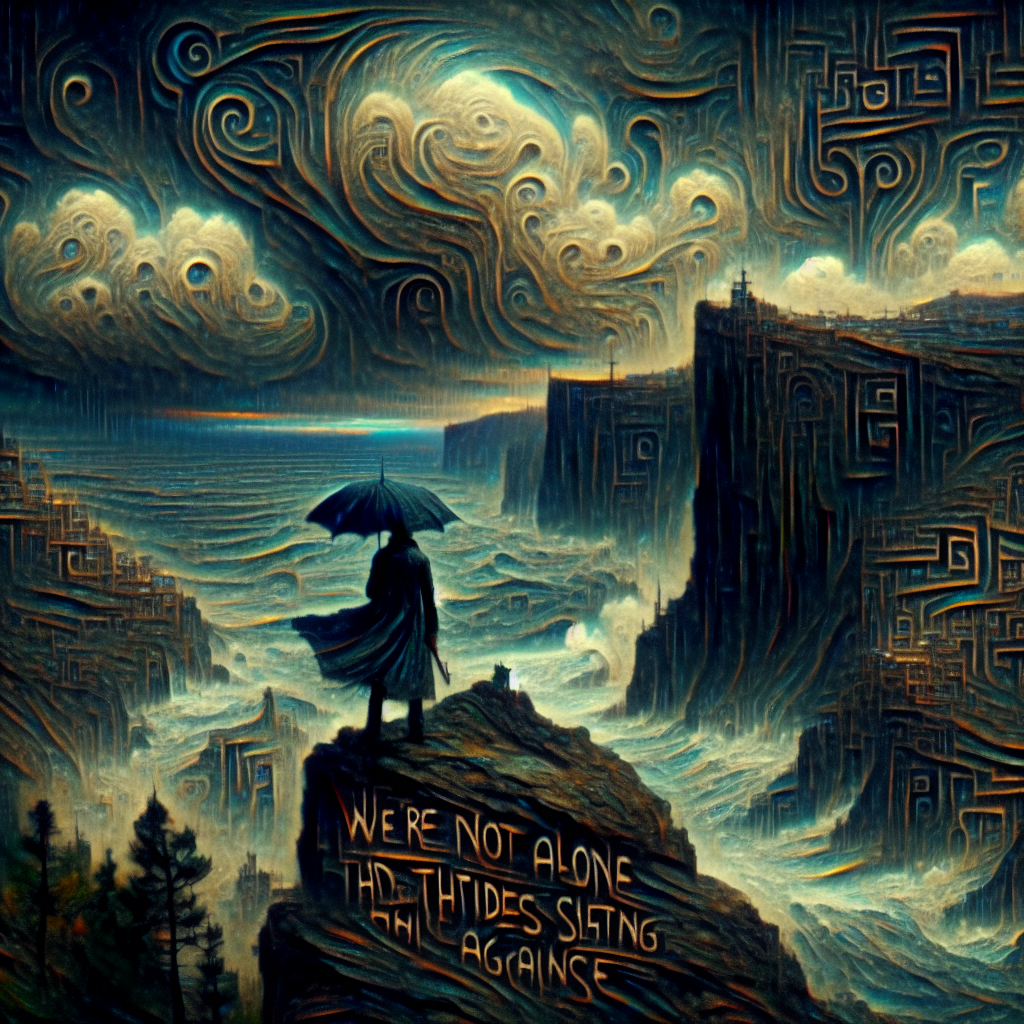

In [15]:
fdir = Path(new_cthulhu_articles[-1]["image_meta"]["cthulhu_image_dir"])
fname = fdir / new_cthulhu_articles[-1]["image_meta"]["cthulhu_image_filename"]

Image(filename=fname, width=300)

In [ ]:
db_utils.insert_cthulhu_articles(new_cthulhu_articles)

2024-12-27T09:55:53.272Z web.db INFO: inserted Cthulhu articles into the local db n=1


1

In [ ]:
cthulhu_articles_2 = db_utils.load_formatted_cthulhu_articles(article_id=None)
cthulhu_articles_2

2024-12-27T09:55:53.283Z web.db DEBUG: getting all Cthulhu articles from the local db article_id=None...
2024-12-27T09:55:53.287Z web.db INFO: fetched and processed all Cthulhu articles from the local db article_id=None n=1 elapsed=0.00s


[{'scene_number': 1,
  'scene_timestamp': datetime.datetime(2024, 12, 27, 9, 55, 19, 571157, tzinfo=datetime.timezone.utc),
  'news_title': 'UK tourists in Canary Islands warned of ‘severe’ weather as it declares state of pre-alert',
  'news_summary': "UK holidaymakers in the Canary Islands have been warned of stormy weather conditions as the government declares a state of 'pre-alert'. Aemet, Spain’s national weather agency, has issued yellow weather warnings for heavy rain in La Palma and Tenerife, along with warnings for 'isolated storms' which may be accompanied by 'heavy rainfall' and 'very strong gusts of wind'. The government is urging residents to follow safety guidance during the extreme weather, including avoiding travelling by road, closing doors and windows if there is lightning, and calling 112 if there is an emergency.",
  'news_published_at': datetime.datetime(2024, 12, 23, 12, 0, 46, tzinfo=datetime.timezone.utc),
  'scene_title': 'The Storm Before the Tide',
  'scene_te